In [227]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from datetime import datetime
from dateutil.relativedelta import relativedelta
from plugins.seaborn_styling_func import set_seaborn_style
set_seaborn_style('Cambria', background_color='#242c4f', grid_color='#546476', text_color='#d7dbe3')

today = datetime.today()
oneyback = datetime(today.year -1, today.month, today.day).strftime('%Y-%m-%d')
twoyback = datetime(today.year -2, today.month, today.day)
todaystr = today.strftime('%Y-%m-%d')

In [228]:
def request_to_dict(url:str):
    try:
        req = requests.get(url, verify=False)
        if req.status_code == 200:
            df = pd.DataFrame(req.json())
            # df['fecha'] = pd.to_datetime(df['fecha'], format='%Y-%m-%d')
        return df
    except Exception as e:
        print(e)
rp_df = request_to_dict("https://api.argentinadatos.com/v1/finanzas/indices/riesgo-pais/")
rp_df['fecha'] = pd.to_datetime(rp_df['fecha'], format='%Y-%m-%d')
rp_df =rp_df[(rp_df['fecha'] < today) & (rp_df['fecha'] > oneyback)]
rp_df_last_value = rp_df['valor'].iloc[-1]

c:\Users\nico\miniconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.argentinadatos.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [229]:
def draw_lineplot(ax, data,x, y,color,label):
    ax = sns.lineplot(data=data, x=x, y=y, color=color, label=label)
    ax.axhline(y=data['valor'].iloc[-1],color=color,linestyle="-.")
    ax.text(x=data['fecha'].iloc[-1],y=data['valor'].iloc[-1],s=data['valor'].iloc[-1],color=color, fontsize=12, ha='left', va='top', weight='bold')

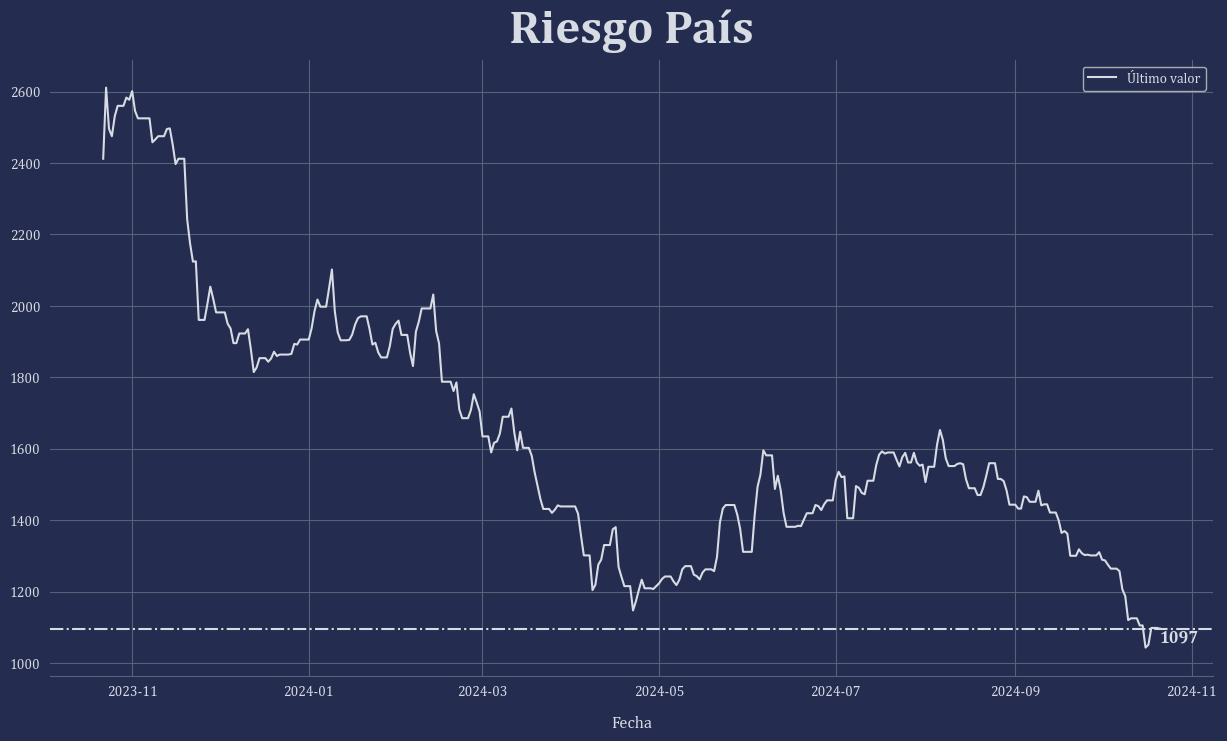

In [230]:
# Riesgo País
fig = plt.figure(figsize=(15,8))
ax_rp = fig.subplots()
draw_lineplot(ax=ax_rp,data=rp_df, x='fecha', y='valor', color='#d7dbe3', label='Último valor')
ax_rp.set_title('Riesgo País', fontsize=34, pad=12, weight='bold')
ax_rp.set_xlabel('Fecha', fontsize=12, labelpad=12)
ax_rp.set_ylabel('')
fig.savefig('./images/rp.png')


In [231]:
interanual_df = request_to_dict("https://api.argentinadatos.com/v1/finanzas/indices/inflacionInteranual/")
interanual_df =interanual_df[(interanual_df['fecha'] < today.strftime("%Y-%m-%d")) & (interanual_df['fecha'] > twoyback.strftime("%Y-%m-%d"))]
inflacion_df = request_to_dict("https://api.argentinadatos.com/v1/finanzas/indices/inflacion/")
inflacion_df = inflacion_df[(inflacion_df['fecha'] < today.strftime("%Y-%m-%d")) & (inflacion_df['fecha'] > twoyback.strftime("%Y-%m-%d"))]

c:\Users\nico\miniconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.argentinadatos.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
c:\Users\nico\miniconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.argentinadatos.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


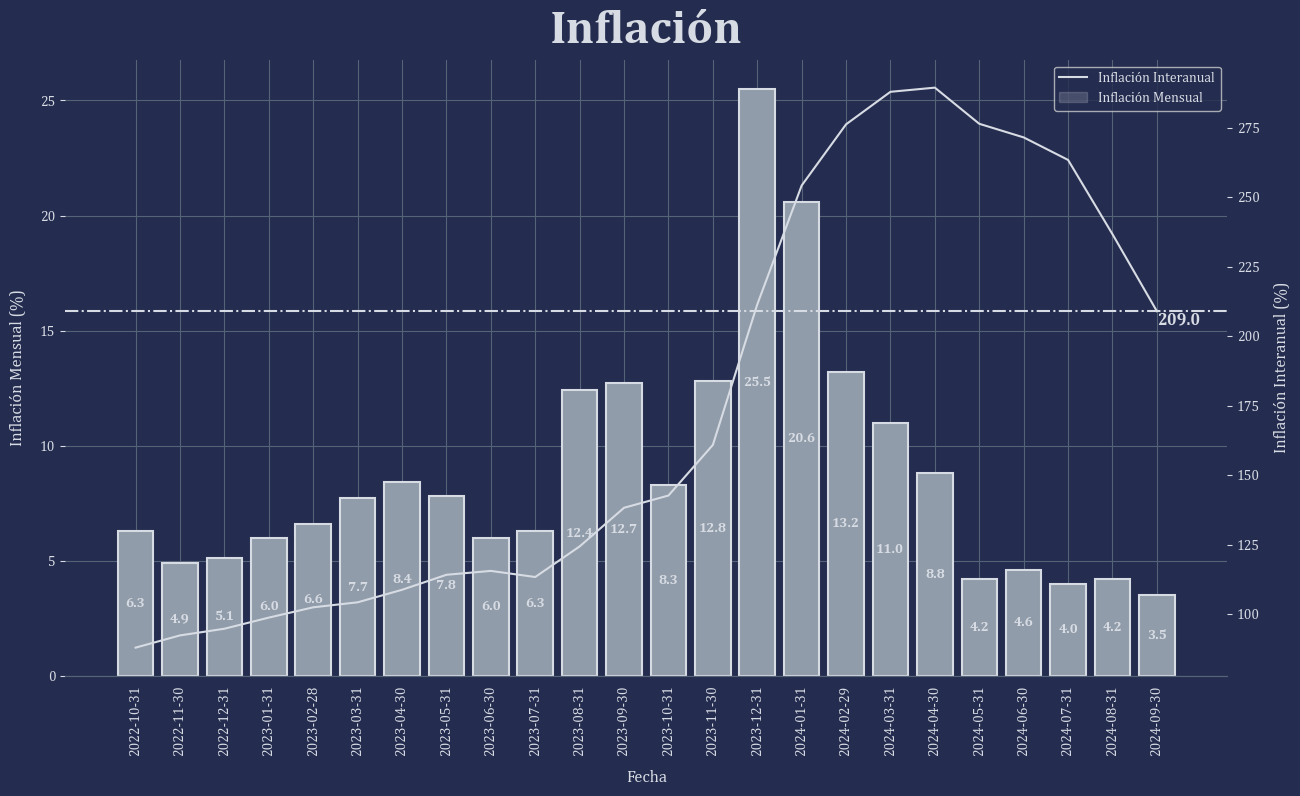

In [232]:
fig_inf,ax_men = plt.subplots(figsize=(15,8))
# Inflacion Mensual
plt.xticks(rotation=90)
ax_men = sns.barplot(data=inflacion_df,x='fecha', y = 'valor', color='#8c9cad', edgecolor="#d7dbe3", linewidth=1.5)
for index, row in inflacion_df.iterrows():
    ax_men.text(row['fecha'], row['valor']/2, row['valor'], horizontalalignment='center',verticalalignment='center', weight='bold')
ax_men.set_ylabel('Inflación Mensual (%)', fontdict={'size':12}, labelpad=10)
ax_men.grid(True)
ax_men.set_title('Inflación', fontsize=34, pad=12, weight='bold')
ax_men.set_xlabel('Fecha', fontdict={'size':12}, labelpad=10)
ax_int = ax_men.twinx()
#Inflacion Interanual
draw_lineplot(ax=ax_int,data=interanual_df,x='fecha',y='valor',color='#d7dbe3',label='Inflación Interanual')
ax_int.set_ylabel('Inflación Interanual (%)', fontdict={'size':12}, labelpad=10)
ax_int.grid(False)
ax_int.legend(loc='upper right', labels=['Inflación Interanual', 'Inflación Mensual'])
fig_inf.savefig('./images/inflacion.png')

In [233]:
def request_to_dict_bcra(url):
    try:
        req = requests.get(url, verify=False)
        if req.status_code == 200:
            df = pd.DataFrame(req.json()['results'])
            # df['fecha'] = pd.to_datetime(df['fecha'], format='%Y-%m-%d')
            return df
    except Exception as e:
        print(e)

tnapf = request_to_dict_bcra(f'https://api.bcra.gob.ar/estadisticas/v2.0/DatosVariable/12/{oneyback}/{todaystr}')
tnapf['fecha'] = pd.to_datetime(tnapf['fecha'], format='%Y-%m-%d')
tnappersonales = request_to_dict_bcra(f'https://api.bcra.gob.ar/estadisticas/v2.0/DatosVariable/14/{oneyback}/{todaystr}')
tnappersonales['fecha'] = pd.to_datetime(tnappersonales['fecha'], format='%Y-%m-%d')

c:\Users\nico\miniconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.bcra.gob.ar'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
c:\Users\nico\miniconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.bcra.gob.ar'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


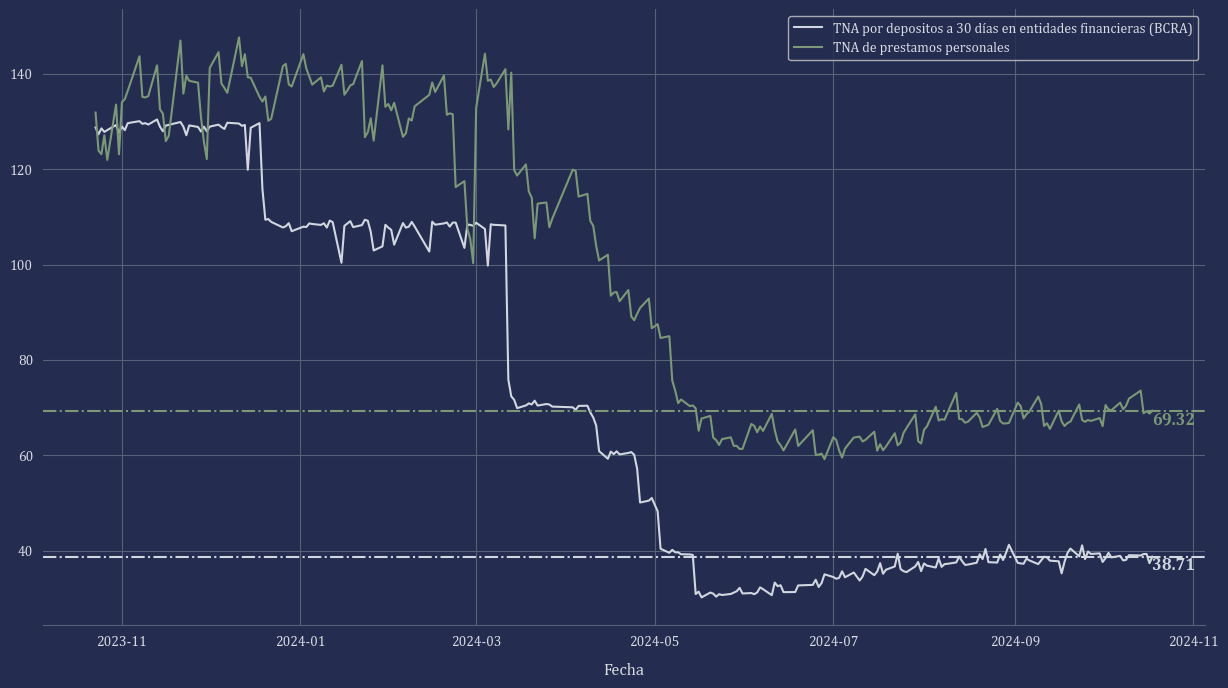

In [234]:
fig_tna,ax_tnapf = plt.subplots(figsize=(15,8))
# TNA Plazo Fijo
# ax_tnapf = sns.lineplot(data=tnapf, x="fecha", y="valor", color="#d0d7e0", label="TNA por depositos a 30 días en entidades financieras (BCRA)")
# ax_tnapf.axhline(y=tnapf['valor'].iloc[-1], color='#d0d7e0', linestyle='-.')
# ax_tnapf.text(tnapf['fecha'].iloc[-1], tnapf['valor'].iloc[-1],tnapf['valor'].iloc[-1], fontsize=12, color='#d0d7e0', ha='left', va='top',weight='bold')
draw_lineplot(ax=ax_tnapf, data=tnapf,x='fecha', y='valor', color="#d0d7e0", label="TNA por depositos a 30 días en entidades financieras (BCRA)")
#TNA Prestamos Personales
draw_lineplot(ax=ax_tnapf, data=tnappersonales,x='fecha', y='valor', color="#7C9878", label="TNA de prestamos personales")
ax_tnapf.set_xlabel('Fecha', fontdict={'size':12}, labelpad=10)
ax_tnapf.set_ylabel('')
fig_tna.savefig('./images/tna.png')


In [235]:
base_monetaria = request_to_dict_bcra(f"https://api.bcra.gob.ar/estadisticas/v2.0/DatosVariable/15/{oneyback}/{todaystr}/")
base_monetaria['fecha'] = pd.to_datetime(base_monetaria['fecha'], format='%Y-%m-%d')
circulante = request_to_dict_bcra(f"https://api.bcra.gob.ar/estadisticas/v2.0/DatosVariable/16/{oneyback}/{todaystr}/")
circulante['fecha'] = pd.to_datetime(circulante['fecha'], format='%Y-%m-%d')

c:\Users\nico\miniconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.bcra.gob.ar'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
c:\Users\nico\miniconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.bcra.gob.ar'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


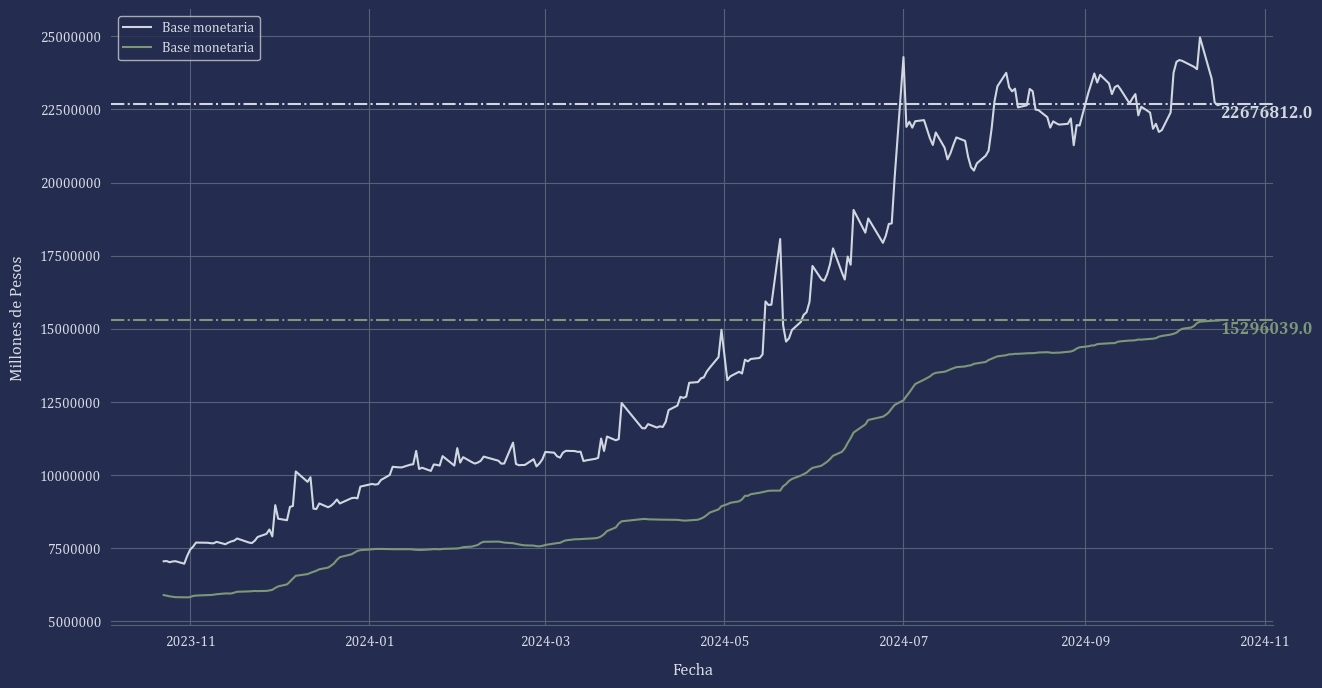

In [236]:
fig_bm,ax_bm = plt.subplots(figsize=(15,8))
ax_bm.ticklabel_format(style='plain')
draw_lineplot(ax=ax_bm, data=base_monetaria, x="fecha", y="valor", color="#d0d7e0", label="Base monetaria")
# ax_bm = sns.lineplot(data=base_monetaria, x="fecha", y="valor", color="#d0d7e0", label="Base monetaria")
# draw_line(base_monetaria['fecha'].iloc[-1], base_monetaria['valor'].iloc[-1], color='#d0d7e0', linestyle='-.', ax=ax_bm)
# ax_bm = sns.lineplot(data=circulante, x="fecha", y="valor", color="#7C9878", label="Circulante")
# draw_line(circulante['fecha'].iloc[-1], circulante['valor'].iloc[-1], color='#7C9878', linestyle='-.',ax = ax_bm)
draw_lineplot(ax=ax_bm, data=circulante, x="fecha", y="valor", color="#7C9878", label="Base monetaria")
ax_bm.set_ylabel('Millones de Pesos', fontdict={'size':12}, labelpad=10)
ax_bm.set_xlabel('Fecha', fontdict={'size':12}, labelpad=10)
fig_bm.savefig('./images/bm.png')

In [240]:
ola = datetime(today.year -1, today.month, today.day, 18)
ola.strftime('%Y-%m-%d:%H:%M:%S')

'2023-10-21:18:00:00'